# Content-based recomended system

### Преимущества
1. персонализированные рекомендации по истории
2. хорошее качество
### Недостатки
1. навязчивая реклама
2. высокие требования к качеству данных
3. необходимо большое количество данных

## Меры сходства
1. Коэффициент корреляции Пирсона: линейную корреляцию между двумя переменными
   
   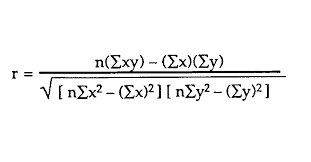
3. Косинусоидальное сходство: косинус угла между двумя векторами
   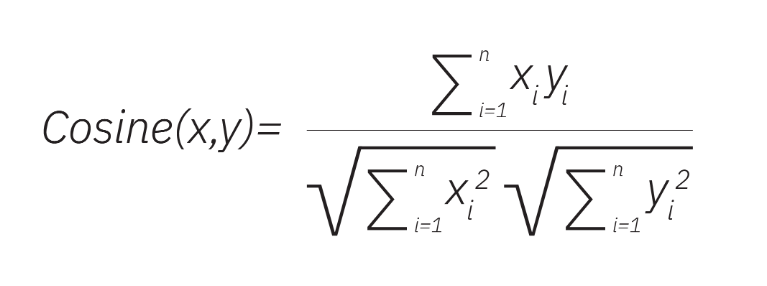
4. Сходство по Жаккарду: измеряет сходство между двумя наборами данных, часто используется для бинарных данных
   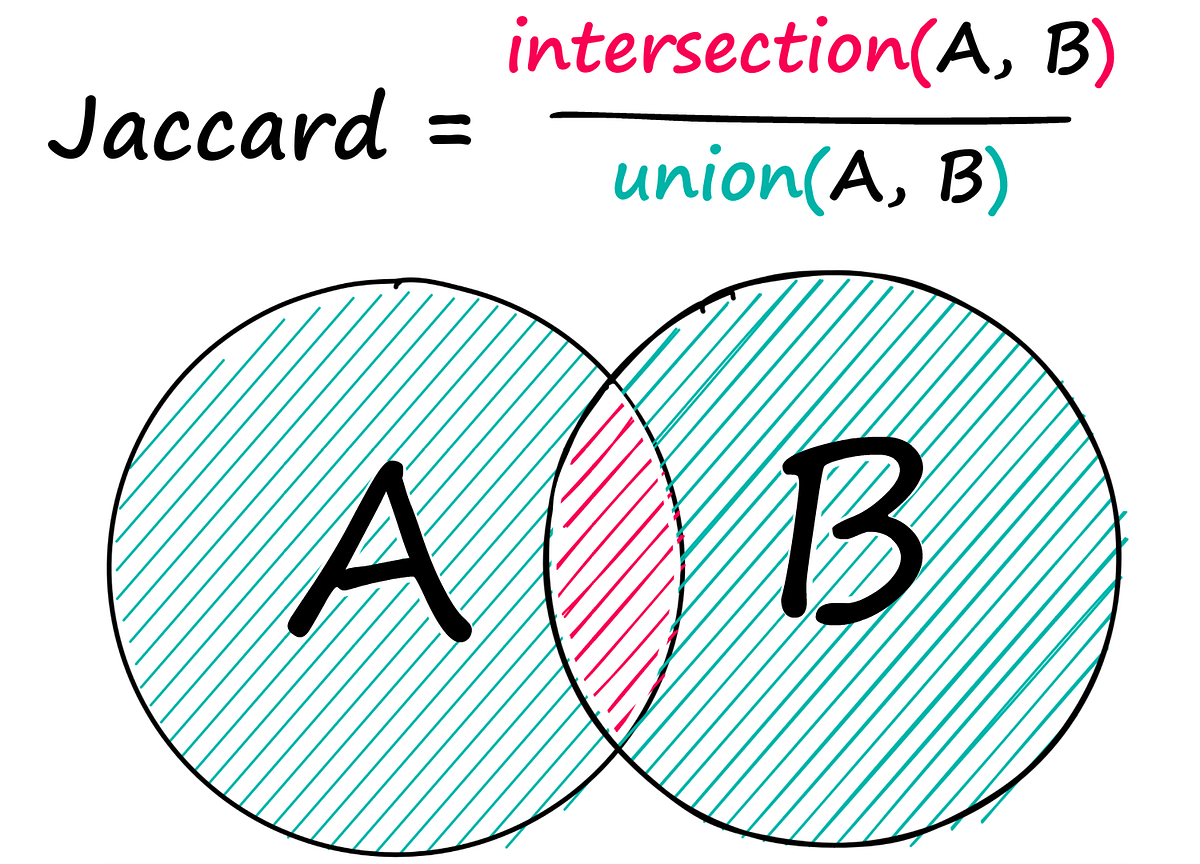
6. Евклидово расстояние: змеряет расстояние по прямой между двумя точками в многомерном пространстве
   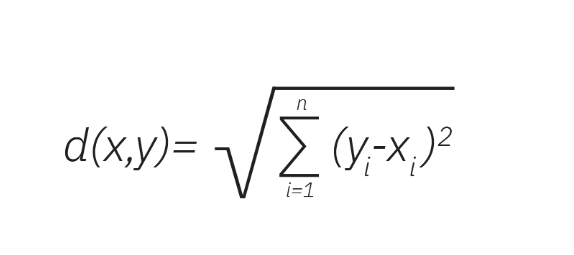
7. Манхэттенское расстояние: измеряет абсолютную разницу между двумя точками в многомерном пространстве
   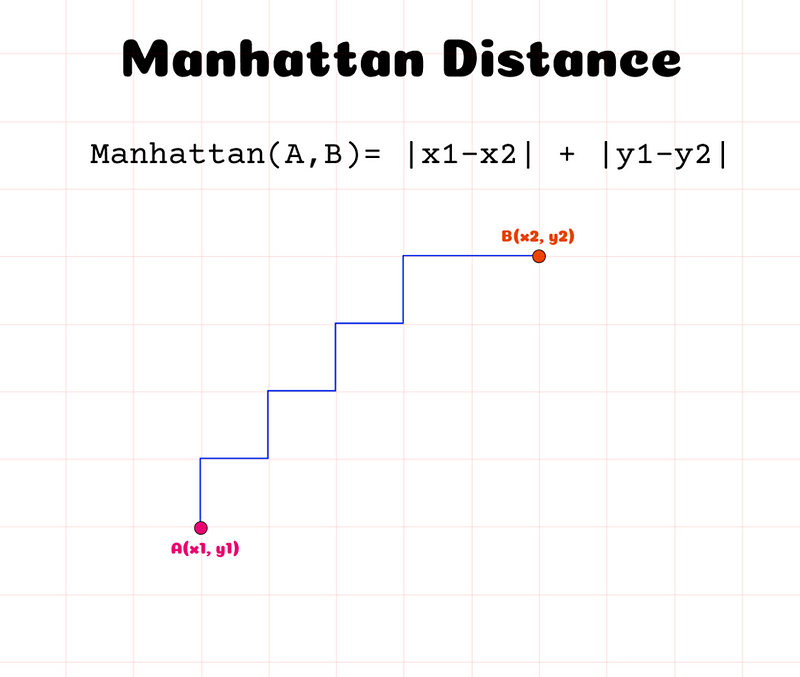

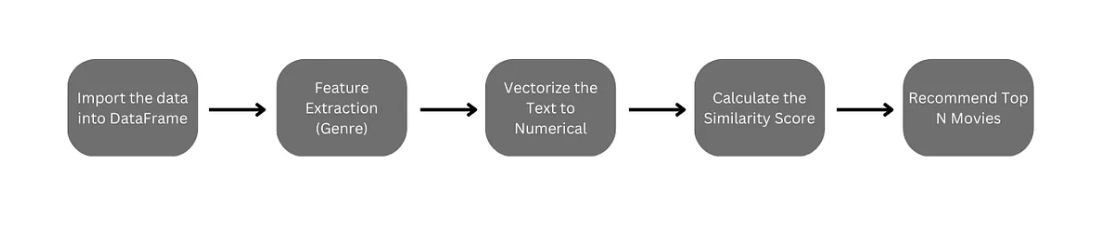

### Binary Feature Matrix Vectorizer

Бинарная матрица характеристик для жанров используется для представления информации о жанрах фильмов в числовой форме, которую можно использовать в качестве входных данных для системы рекомендаций. Идея заключается в том, чтобы представить каждый фильм с помощью набора бинарных характеристик, которые указывают, относится ли фильм к определенному жанру или нет. Это позволяет системе сравнивать фильмы на основе их жанрового сходства, а не по другим признакам, таким как режиссер, актерский состав или год выпуска.

Результатом бинарной матрицы характеристик для жанров будет матрица, в которой каждая строка соответствует фильму, а каждый столбец - жанру. Если фильм относится к определенному жанру, соответствующая запись в матрице будет равна 1, в противном случае - 0.

In [38]:
#Import all the required packages
import pandas as pd
from sklearn.metrics.pairwise import cosine_similarity

In [3]:
# Load the movies.csv file into a Pandas dataframe
movies = pd.read_csv('F:/Data/movies.csv')

In [4]:
movies.head(3)

,index,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,...,runtime,spoken_languages,status,tagline,title,vote_average,vote_count,cast,crew,director
0,0,237000000,Action Adventure Fantasy Science Fiction,http://www.avatarmovie.com/,19995,culture clash future space war space colony so...,en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,...,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800,Sam Worthington Zoe Saldana Sigourney Weaver S...,"[{'name': 'Stephen E. Rivkin', 'gender': 0, 'd...",James Cameron
1,1,300000000,Adventure Fantasy Action,http://disney.go.com/disneypictures/pirates/,285,ocean drug abuse exotic island east india trad...,en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,...,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500,Johnny Depp Orlando Bloom Keira Knightley Stel...,"[{'name': 'Dariusz Wolski', 'gender': 2, 'depa...",Gore Verbinski
2,2,245000000,Action Adventure Crime,http://www.sonypictures.com/movies/spectre/,206647,spy based on novel secret agent sequel mi6,en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,...,148.0,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",Released,A Plan No One Escapes,Spectre,6.3,4466,Daniel Craig Christoph Waltz L\u00e9a Seydoux ...,"[{'name': 'Thomas Newman', 'gender': 2, 'depar...",Sam Mendes


In [46]:
movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4803 entries, 0 to 4802
Data columns (total 24 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   index                 4803 non-null   int64  
 1   budget                4803 non-null   int64  
 2   genres                4775 non-null   object 
 3   homepage              1712 non-null   object 
 4   id                    4803 non-null   int64  
 5   keywords              4391 non-null   object 
 6   original_language     4803 non-null   object 
 7   original_title        4803 non-null   object 
 8   overview              4800 non-null   object 
 9   popularity            4803 non-null   float64
 10  production_companies  4803 non-null   object 
 11  production_countries  4803 non-null   object 
 12  release_date          4802 non-null   object 
 13  revenue               4803 non-null   int64  
 14  runtime               4801 non-null   float64
 15  spoken_languages     

In [16]:
# Create a binary feature matrix for the genres
#genre_matrix = pd.get_dummies(movies['genres'].str.split("|").apply(pd.Series).stack()).sum(level=0)

#genre_matrix = pd.get_dummies(movies['genres'].str.get_dummies(sep='|'))
# Sum duplicate columns
#genre_matrix = genre_matrix.groupby(genre_matrix.columns, axis=1).sum()

genre_matrix = pd.get_dummies(movies['genres'].str.get_dummies(sep='|'))
genre_matrix

,Action,Action Adventure,Action Adventure Animation Comedy Family,Action Adventure Animation Comedy Science Fiction,Action Adventure Animation Family,Action Adventure Animation Family Fantasy,Action Adventure Animation Fantasy Science Fiction,Action Adventure Animation Science Fiction Thriller,Action Adventure Comedy,Action Adventure Comedy Crime,...,War Western,Western,Western Action Drama History,Western Adventure,Western Animation Adventure Comedy Family,Western Comedy,Western Drama,Western Drama Adventure Thriller,Western History,Western History War
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4798,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4799,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4800,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4801,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [17]:
# Compute the cosine similarity matrix
similarity = cosine_similarity(genre_matrix)
similarity

array([[1., 0., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 1.]])

In [18]:
# Function to get the recommended movies
def get_recommendations(title, top_n=5):
    # Find the index of the movie with the given title
    idx = movies[movies['title'] == title].index[0]
    
    # Get the cosine similarity scores for the movie
    similarity_scores = list(enumerate(similarity[idx]))
    
    # Sort the similarity scores in descending order
    similarity_scores = sorted(similarity_scores, key=lambda x: x[1], reverse=True)
    
    # Get the top_n movie indices
    movie_indices = [i[0] for i in similarity_scores[1:top_n+1]]
    
    # Return the top_n most similar movies
    return movies['title'].iloc[movie_indices]

In [20]:
# Ask the user for the movie name
title = input("Enter the title of your favorite movie: ")

Enter the title of your favorite movie:  Avatar


In [21]:
# Get the recommended movies
print("Top 5 similar movies:")
print(get_recommendations(title))

Top 5 similar movies:
14                                   Man of Steel
46                     X-Men: Days of Future Past
813                                      Superman
870                                   Superman II
3494    Beastmaster 2: Through the Portal of Time
Name: title, dtype: object


### Using Bags Of Words

BoW - это способ представления текстовых данных в числовой форме, при котором
каждое слово в текстовом документе рассматривается как отдельный элемент. В контексте
рекомендаций по фильмам BoW обычно используется для представления описаний фильмов,
кратких изложений или информации о жанре.

Составляется словарь с уникальными словами в результате фильм можно представить как вектор с длиной равной длине словаря. Каждый элемент словаря это слово, а значение это частота использования в описании.

In [ ]:
#Import all the required packages
import pandas as pd
from sklearn.metrics.pairwise import cosine_similarity

In [ ]:
# Load the movies.csv file into a Pandas dataframe
movies = pd.read_csv('F:/Data/movies.csv')

In [25]:
# Extract the movie titles and genres into separate lists
titles = movies['title'].tolist()
#genres = movies['genres'].str.split("|").tolist()
genres = movies['genres'].str.split("|").apply(lambda x: x if isinstance(x, list) else []).tolist()

In [32]:
# Create a bag of words representation of the movie genres
#def create_bow(genre_list):
#    bow = {}
#    for genre in genre_list:
#        bow[genre] = 1
#    return bow

def create_bow(genre_list):
    bow = {}
    for genre in genre_list:
        bow[genre] = bow.get(genre, 0) + 1  # Count occurrences
    return bow

In [33]:
# Create a list of bags of words representations of the movie genres
bags_of_words = [create_bow(movie_genres) for movie_genres in genres]

In [36]:
genre_df = pd.DataFrame(bags_of_words).fillna(0)
# Create a dataframe to store the bags of words representation of the movie genres
#genre_df = pd.DataFrame(bags_of_words, index=titles).fillna(0)
genre_df

,Action Adventure Fantasy Science Fiction,Adventure Fantasy Action,Action Adventure Crime,Action Crime Drama Thriller,Action Adventure Science Fiction,Fantasy Action Adventure,Animation Family,Adventure Fantasy Family,Action Adventure Fantasy,Adventure Fantasy Action Science Fiction,...,Documentary History,Science Fiction Drama Mystery,Drama Fantasy Horror Science Fiction,Documentary Comedy Drama,Mystery Horror Thriller,Horror Comedy Crime,Crime Horror Mystery Thriller,Thriller Horror Comedy,Foreign Thriller,Comedy Drama Romance TV Movie
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4798,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4799,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4800,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4801,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [37]:
# Calculate the cosine similarity matrix between the movies
cosine_similarity = cosine_similarity(genre_df)

# Create a dataframe with the cosine similarity scores
#similarity_df = pd.DataFrame(cosine_similarity, index=genre_df.index, columns=genre_df.index)
similarity_df = pd.DataFrame(cosine_sim, index=titles, columns=titles)
similarity_df

TypeError: 'numpy.ndarray' object is not callable

In [30]:
# Ask the user for a movie they like
movie = input('Enter a movie you like: ')

Enter a movie you like:  Avatar


In [31]:
# Find the index of the movie in the similarity dataframe
movie_index = similarity_df.index.get_loc(movie)

# Get the top 5 most similar movies to the movie
top_10 = similarity_df.iloc[movie_index].sort_values(ascending=False)[1:11]

# Print the top 5 most similar movies to the movie
print(f'Top 10 similar movies to {movie}:')
print(top_10)

Top 10 similar movies to Avatar:
Beastmaster 2: Through the Portal of Time    1.0
Superman II                                  1.0
X-Men: Days of Future Past                   1.0
Man of Steel                                 1.0
Superman                                     1.0
Crocodile Dundee                             0.0
Polisse                                      0.0
Beneath Hill 60                              0.0
The I Inside                                 0.0
Ultramarines: A Warhammer 40,000 Movie       0.0
Name: Avatar, dtype: float64


In [44]:
#Import all the required packages
import pandas as pd
from sklearn.metrics.pairwise import cosine_similarity

# Load the movies.csv file into a Pandas dataframe
movies = pd.read_csv('F:/Data/movies.csv')

# Extract the movie titles and genres into separate lists
titles = movies['title'].tolist()
genres = movies['genres'].str.split("|").tolist()

# Create a bag of words representation of the movie genres
def create_bow(genre_list):
    bow = {}
    for genre in genre_list:
        bow[genre] = 1
    return bow
    

# Create a list of bags of words representations of the movie genres
bags_of_words = [create_bow(movie_genres) for movie_genres in genres]

# Create a dataframe to store the bags of words representation of the movie genres
genre_df = pd.DataFrame(bags_of_words, index=titles).fillna(0)

# Calculate the cosine similarity matrix between the movies
cosine_similarity = cosine_similarity(genre_df)

# Create a dataframe with the cosine similarity scores
similarity_df = pd.DataFrame(cosine_similarity, index=genre_df.index, columns=genre_df.index)

# Ask the user for a movie they like
movie = input('Enter a movie you like: ')

# Find the index of the movie in the similarity dataframe
movie_index = similarity_df.index.get_loc(movie)

# Get the top 5 most similar movies to the movie
top_10 = similarity_df.iloc[movie_index].sort_values(ascending=False)[1:11]

# Print the top 5 most similar movies to the movie
print(f'Top 10 similar movies to {movie}:')
print(top_10)

TypeError: 'float' object is not iterable

### Using Tf-IDF Vectorizer

Статистическая мера используемая для оценки важности слова в контексте документа, являющегося частью коллекции документов. Вес слова пропорционален частоте употребления его в тексте и обратно пропорционален употреблению его в коллекции.

Term Frequency - число раз, которое слово встречается в документе
Inverse Document Frequency - инверсия частоты с которой слово встречается в документах коллекции

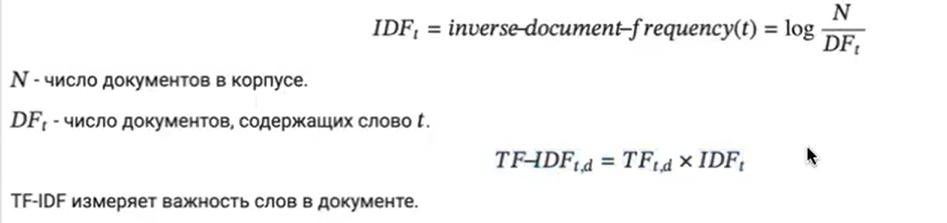

In [39]:
#Import all the required packages
import pandas as pd
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.feature_extraction.text import TfidfVectorizer

In [40]:
# Combine the genres for each movie into a single string
genres_combined = movies['genres'].str.replace('|', ' ')

In [41]:
# Create a TfidfVectorizer object to transform the movie genres into a Tf-idf representation
tfidf = TfidfVectorizer()
tfidf_matrix = tfidf.fit_transform(genres_combined)

ValueError: np.nan is an invalid document, expected byte or unicode string.

In [45]:
#Import all the required packages
import pandas as pd
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.feature_extraction.text import TfidfVectorizer

# Load the movies.csv file into a Pandas dataframe
movies = pd.read_csv('F:/Data/movies.csv')

# Combine the genres for each movie into a single string
genres_combined = movies['genres'].str.replace('|', ' ')

# Create a TfidfVectorizer object to transform the movie genres into a Tf-idf representation
tfidf = TfidfVectorizer()
tfidf_matrix = tfidf.fit_transform(genres_combined)

# Calculate the cosine similarity matrix between the movies
cosine_similarity = cosine_similarity(tfidf_matrix)

# Create a dataframe with the cosine similarity scores
similarity_df = pd.DataFrame(cosine_similarity, index=movies['title'], columns=movies['title'])

# Ask the user for a movie they like
movie = input('Enter a movie you like: ')

# Find the index of the movie in the similarity dataframe
movie_index = similarity_df.index.get_loc(movie)

# Get the top 10 most similar movies to the movie
top_10 = similarity_df.iloc[movie_index].sort_values(ascending=False)[1:11]

# Print the top 10 most similar movies to the movie
print(f'Top 10 similar movies to {movie}:')
print(top_10)

ValueError: np.nan is an invalid document, expected byte or unicode string.